### Prediciting and Plotting Product Demand

Importing Packages

In [1]:
import pandas as pd
import numpy as np
import pulp

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('updated_orders.csv')

This function predicts product demand for a given series. You shouldn't modify this function.

In [3]:
### Predict demand for Port 09
### Dataframe (y) must have date as the index and have a single column (called a series)

def plot_demand_prediction(y, start_prediction_date):
    y.index = pd.to_datetime(y.index)
    y = pd.DataFrame(y.reset_index())
    y = y[y['Order Date'] < '12/31/2019']
    y = y.groupby('Order Date').sum()
    
    mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    
    pred = results.get_prediction(start=pd.to_datetime(start_prediction_date), dynamic=False)
    pred_ci = pred.conf_int()
    ax = y['2019':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Order_Qty')
    plt.legend()
    plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


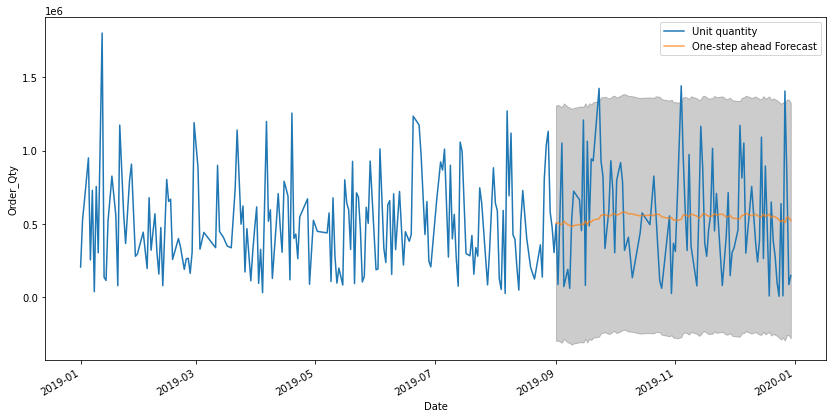

In [4]:
### See if you can create y to make the following function run. run. 
### Hint: You'll need to index into when the destination port is 9. Then, set the index to the order date and use
### the unit quantity as the column to plot.

# your code here
orders.set_index('Order Date', inplace = True)
orders = orders[orders['Destination Port'] == 'PORT09']
y = orders['Unit quantity']

plot_demand_prediction(y, '9/1/19')

In [5]:
assert y.iloc[200] == 5452
assert y.iloc[1000] == 4153